/home/terrorgarten/SEM5/IMS/IMS_P1/venv/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


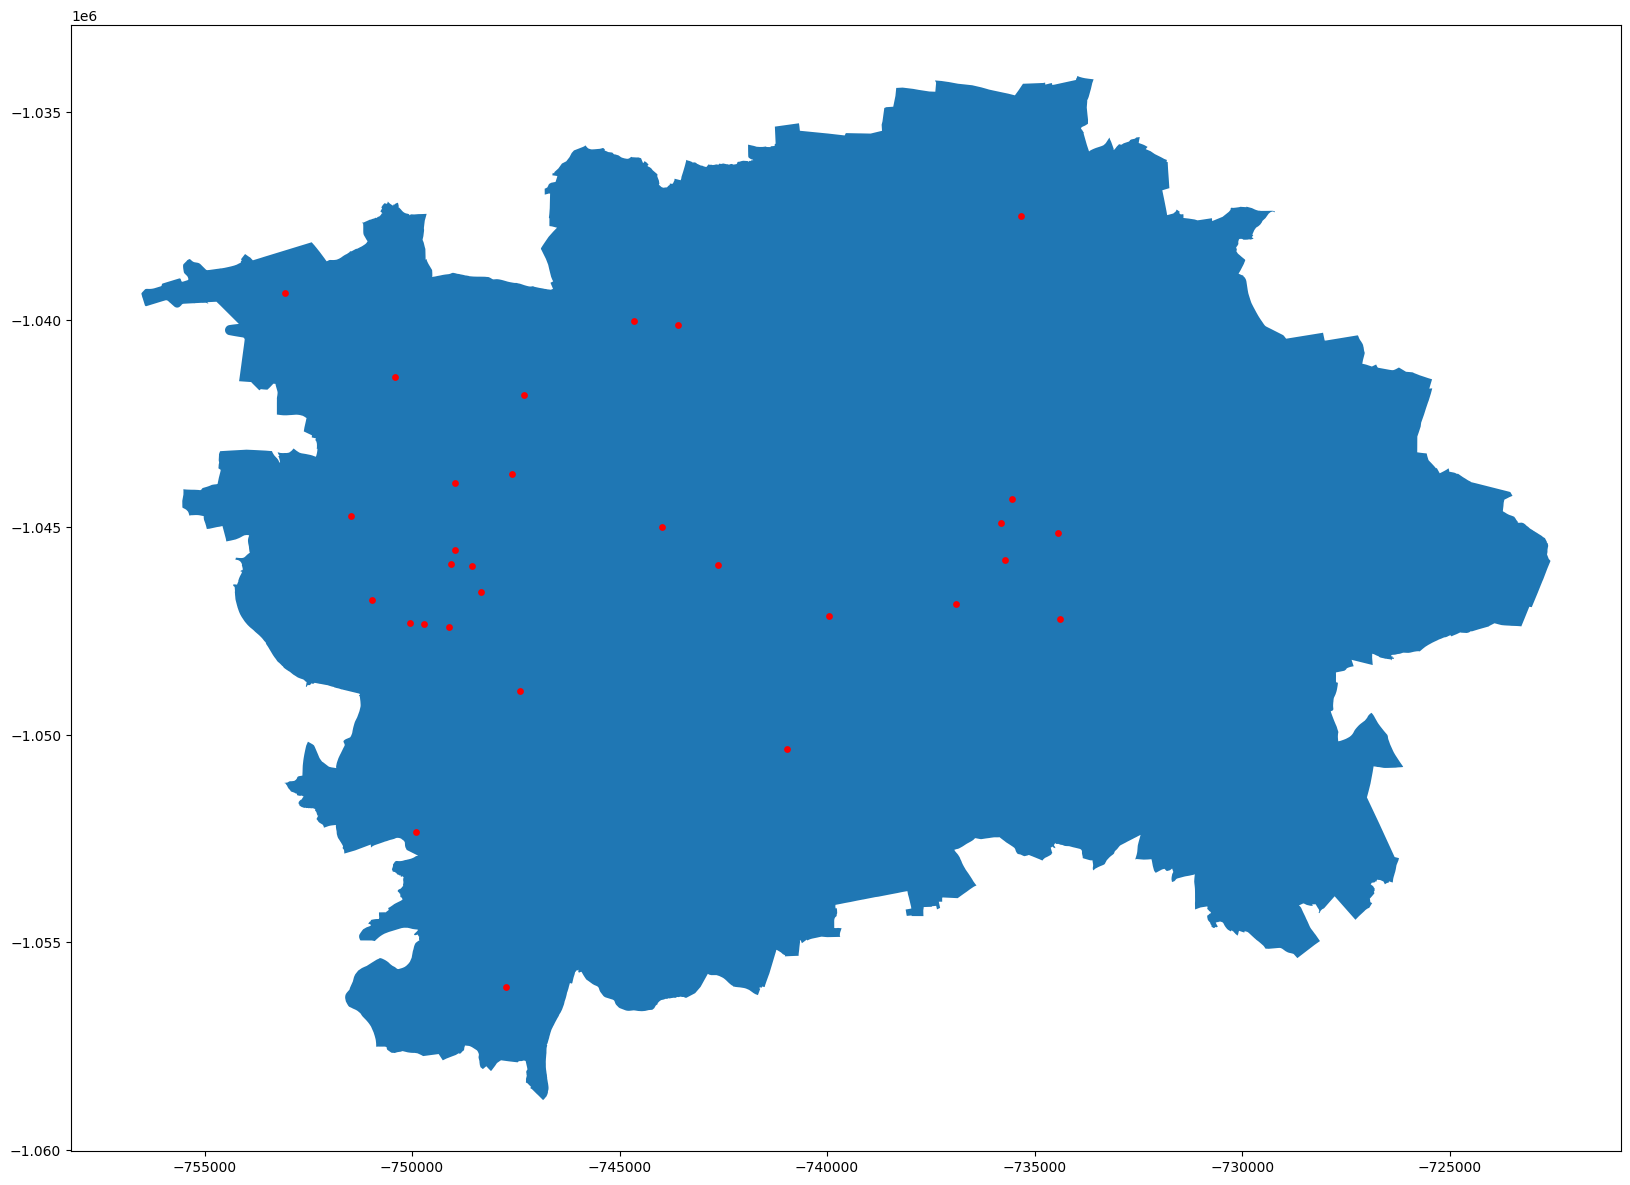

In [36]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
import json
from pyproj import Transformer
import csv
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Polygon
import numpy as np

#
# data = pd.read_json("dataset.json")
#
# df = pd.Dataframe(data["feature");


DATAFILE = "dataset.json"
FACTORIES_TO_SHOW = 30

with open(DATAFILE) as f:
    json_data = json.load(f)

factory_list = []
for record in json_data["features"]:
    x_cord = record["properties"]["X"]
    y_cord = record["properties"]["Y"]
    name = record["properties"]["PROVOZ"]
    emissions = record["properties"]["CO2EKV"]
    #x_cord, y_cord = transformer.transform(x_cord, y_cord)
    factory_tuple = (x_cord, y_cord, name, emissions)
    factory_list.append(factory_tuple)

factory_list.sort(key=lambda a: a[3])
fin_list = factory_list[-FACTORIES_TO_SHOW:]

with open('filtered_data.csv', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)

    write.writerow(["X", "Y", "Name", "Emissions"])
    write.writerows(fin_list)

df = pd.read_csv("filtered_data.csv", delimiter=',', skiprows=0, low_memory=False)

crs={'init':'epsg:5514'}

geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]



gdf = GeoDataFrame(df, crs=crs, geometry=geometry)

prague_shapefile = gpd.read_file(r'PRAHA_P.shp')
gdf.plot(ax=prague_shapefile.plot(figsize=(20, 20)), marker='o', color='red', markersize=15, )
gdf.to_file("prague_points.shp");




